# Kaggle Competition 1_DSAI OmahTI 22/23
---
Nama: Azhar Bagaskara

# Introduction
Dalam notebook ini, akan dilakukan prediksi terhadap variabel `status pembatalan`. Jenis prediksinya adalah klasifikasi karena variabel tersebut hanya terdiri dari dua nilai, yaitu 0 dan 1.

# Exploratory Data Analysis

## Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.head()

,Pilihan Paket Makan,Membawa Mobil atau Tidak,Tipe Villa yang Dipesan,tipe_pemesanan,pernah_memesan,jumlah pemesanan pembatalan,jumlah pemesanan non-pembatalan,harga pemesanan,jumlah_permintaan_khusus,tanggal_pemesanan,jumlah dewasa;jumlah anak2,malam weekdays | malam weekend,Jarak Kedatangan,status pembatalan
0,Paket Makan *,0,Villa Tipe 1,Pembelian on-site,Tidak Pernah,Tidak Ada,Tidak Ada,1489500.0 IDR,Tidak Ada,2017-8-26,2;1 Pax,3 | 0 Malam,1 hari,0
1,Paket Makan *,0,Villa Tipe 1,Aplikasi pihak ketiga,Tidak Pernah,Tidak Ada,Tidak Ada,"1687500.0,00",Tidak Ada,2018-6-27,2;1 Pax,0 | 1 Malam,74 hari,0
2,Paket Makan *,0,Villa Tipe 6,Aplikasi pihak ketiga,Tidak Pernah,Tidak Ada,Tidak Ada,2349000.0 IDR,Tidak Ada,2018-12-19,2;2 Pax,0 | 1 Malam,56 hari,1
3,Tanpa Paket Makan,0,Villa Tipe 1,Aplikasi pihak ketiga,Tidak Pernah,Tidak Ada,Tidak Ada,"1466850.0,00",1 Item,2018-9-2,2;0 Pax,3 | 2 Malam,6 hari,0
4,Paket Makan *,1,Villa Tipe 1,NaN,Tidak Pernah,Tidak Ada,Tidak Ada,1907250.0 IDR,NaN,2018-6-1,2;0 Pax,NaN,NaN,0


In [5]:
train_df.columns

Index(['Pilihan Paket Makan', 'Membawa Mobil atau Tidak',
       'Tipe Villa yang Dipesan', 'tipe_pemesanan', 'pernah_memesan',
       'jumlah pemesanan pembatalan', 'jumlah pemesanan non-pembatalan',
       'harga pemesanan', 'jumlah_permintaan_khusus', 'tanggal_pemesanan',
       'jumlah dewasa;jumlah anak2', 'malam weekdays | malam weekend',
       'Jarak Kedatangan', 'status pembatalan'],
      dtype='object')

Karena nama kolomnya terlihat tidak konsisten dan terlalu berantakan, maka akan diubah agar mempermudah proses analisis.

In [6]:
# Ubah nama kolom
train_df = train_df.rename(columns={'Pilihan Paket Makan': 'paket_makan', 
                        'Membawa Mobil atau Tidak': 'bawa_mobil',
                        'Tipe Villa yang Dipesan': 'tipe_villa',
                        'jumlah pemesanan pembatalan': 'jumlah_pemesanan_pembatalan',
                        'jumlah pemesanan non-pembatalan': 'jumlah_pemesanan_non-pembatalan',
                        'harga pemesanan': 'harga_pemesanan',
                        'jumlah dewasa;jumlah anak2': 'jumlah_dewasa;jumlah_anak',
                        'malam weekdays | malam weekend': 'malam_weekdays|malam_weekend',
                        'Jarak Kedatangan': 'jarak_kedatangan',
                        'status pembatalan': 'status_pembatalan'})

In [7]:
train_df.shape

(34966, 14)

Dataset tersebut terdiri dari 34966 records dan 14 features.

In [8]:
train_df.nunique()

paket_makan                           4
bawa_mobil                            2
tipe_villa                            7
tipe_pemesanan                        4
pernah_memesan                        2
jumlah_pemesanan_pembatalan           9
jumlah_pemesanan_non-pembatalan      55
harga_pemesanan                    5167
jumlah_permintaan_khusus              6
tanggal_pemesanan                   550
jumlah_dewasa;jumlah_anak            16
malam_weekdays|malam_weekend         49
jarak_kedatangan                    345
status_pembatalan                     2
dtype: int64

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34966 entries, 0 to 34965
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   paket_makan                      34966 non-null  object
 1   bawa_mobil                       34966 non-null  int64 
 2   tipe_villa                       34966 non-null  object
 3   tipe_pemesanan                   23396 non-null  object
 4   pernah_memesan                   34966 non-null  object
 5   jumlah_pemesanan_pembatalan      34966 non-null  object
 6   jumlah_pemesanan_non-pembatalan  34966 non-null  object
 7   harga_pemesanan                  34966 non-null  object
 8   jumlah_permintaan_khusus         28930 non-null  object
 9   tanggal_pemesanan                34966 non-null  object
 10  jumlah_dewasa;jumlah_anak        34966 non-null  object
 11  malam_weekdays|malam_weekend     25910 non-null  object
 12  jarak_kedatangan                

Dari informasi jumlah unique masing-masing feature dan sampel dari head, maka bisa dipisahkan mana feature yang berupa kategorikal dan mana feature yang berupa numerik. Akan tetapi, ada feature numerik yang masih bertipekan objek. Oleh sebab itu, akan dilakukan pengonversian tipe data. Selain itu, akan dilakukan juga pemisahan nilai pada feature `jumlah_dewasa;jumlah_anak` dan `malam_weekdays|malam_weekend` karena kedua feature tersebut memiliki nilai numerik yang dijadikan satu kesatuan.

## Fix Features
Di bagian ini, akan dilakukan perbaikan features agar bisa dianalisis lebih lanjut.

In [10]:
train_df_fixed = train_df.copy()

# Feature jumlah_pemesanan_pembatalan
train_df_fixed['jumlah_pemesanan_pembatalan'][train_df_fixed['jumlah_pemesanan_pembatalan'] == 'Tidak Ada'] = '0'
train_df_fixed['jumlah_pemesanan_pembatalan'] = train_df_fixed['jumlah_pemesanan_pembatalan'].apply(lambda i: i.split(' ')[0])
train_df_fixed['jumlah_pemesanan_pembatalan'] = train_df_fixed['jumlah_pemesanan_pembatalan'].astype(float)

# Feature jumlah_pemesanan_non-pembatalan
train_df_fixed['jumlah_pemesanan_non-pembatalan'][train_df_fixed['jumlah_pemesanan_non-pembatalan'] == 'Tidak Ada'] = '0'
train_df_fixed['jumlah_pemesanan_non-pembatalan'] = train_df_fixed['jumlah_pemesanan_non-pembatalan'].apply(lambda i: i.split(' ')[0])
train_df_fixed['jumlah_pemesanan_non-pembatalan'] = train_df_fixed['jumlah_pemesanan_non-pembatalan'].astype(float)

# Feature harga_pemesanan
train_df_fixed['harga_pemesanan'] = train_df_fixed['harga_pemesanan'].apply(lambda i: i.split('.')[0])
train_df_fixed['harga_pemesanan'] = train_df_fixed['harga_pemesanan'].astype(float)

# Feature jumlah_permintaan_khusus (ada null)
train_df_fixed['jumlah_permintaan_khusus'][train_df_fixed['jumlah_permintaan_khusus'] == 'Tidak Ada'] = '0'
train_df_fixed['jumlah_permintaan_khusus'] = train_df_fixed['jumlah_permintaan_khusus'].apply(lambda i: i.split(' ')[0] if pd.notnull(i) else i)
train_df_fixed['jumlah_permintaan_khusus'] = train_df_fixed['jumlah_permintaan_khusus'].astype(float)

# Feature tanggal_pemesanan
train_df_fixed['tahun'] = train_df_fixed['tanggal_pemesanan'].apply(lambda i: i.split('-')[0] if pd.notnull(i) else i)
train_df_fixed['bulan'] = train_df_fixed['tanggal_pemesanan'].apply(lambda i: i.split('-')[1] if pd.notnull(i) else i)
train_df_fixed['tanggal'] = train_df_fixed['tanggal_pemesanan'].apply(lambda i: i.split('-')[2] if pd.notnull(i) else i)

train_df_fixed['tahun'] = train_df_fixed['tahun'].astype(int)
train_df_fixed['bulan'] = train_df_fixed['bulan'].astype(int)
train_df_fixed['tanggal'] = train_df_fixed['tanggal'].astype(int)

train_df_fixed.drop('tanggal_pemesanan', axis=1, inplace=True)

# Feature jumlah_dewasa;jumlah_anak
train_df_fixed['jumlah_dewasa;jumlah_anak'] = train_df_fixed['jumlah_dewasa;jumlah_anak'].apply(lambda i: i.split(' ')[0])
train_df_fixed['jumlah_dewasa'] = train_df_fixed['jumlah_dewasa;jumlah_anak'].apply(lambda i: i.split(';')[0])
train_df_fixed['jumlah_anak'] = train_df_fixed['jumlah_dewasa;jumlah_anak'].apply(lambda i: i.split(';')[1])
train_df_fixed['jumlah_dewasa'] = train_df_fixed['jumlah_dewasa'].astype(float)
train_df_fixed['jumlah_anak'] = train_df_fixed['jumlah_anak'].astype(float)
train_df_fixed = train_df_fixed.drop('jumlah_dewasa;jumlah_anak', axis=1)

# Feature malam_weekdays|malam_weekend (ada null)
train_df_fixed['malam_weekdays'] = train_df_fixed['malam_weekdays|malam_weekend'].apply(lambda i: i.split(' ')[0] if pd.notnull(i) else i)
train_df_fixed['malam_weekend'] = train_df_fixed['malam_weekdays|malam_weekend'].apply(lambda i: i.split(' ')[2] if pd.notnull(i) else i)
train_df_fixed['malam_weekdays'] = train_df_fixed['malam_weekdays'].astype(float)
train_df_fixed['malam_weekend'] = train_df_fixed['malam_weekend'].astype(float)
train_df_fixed = train_df_fixed.drop('malam_weekdays|malam_weekend', axis=1)

# Feature jarak_kedatangan (ada null)
train_df_fixed['jarak_kedatangan'] = train_df_fixed['jarak_kedatangan'].apply(lambda i: i.split(' ')[0] if pd.notnull(i) else i)
train_df_fixed['jarak_kedatangan'] = train_df_fixed['jarak_kedatangan'].astype(float)

In [11]:
train_df_fixed

,paket_makan,bawa_mobil,tipe_villa,tipe_pemesanan,pernah_memesan,jumlah_pemesanan_pembatalan,jumlah_pemesanan_non-pembatalan,harga_pemesanan,jumlah_permintaan_khusus,jarak_kedatangan,status_pembatalan,tahun,bulan,tanggal,jumlah_dewasa,jumlah_anak,malam_weekdays,malam_weekend
0,Paket Makan *,0,Villa Tipe 1,Pembelian on-site,Tidak Pernah,0.0,0.0,1489500.0,0.0,1.0,0,2017,8,26,2.0,1.0,3.0,0.0
1,Paket Makan *,0,Villa Tipe 1,Aplikasi pihak ketiga,Tidak Pernah,0.0,0.0,1687500.0,0.0,74.0,0,2018,6,27,2.0,1.0,0.0,1.0
2,Paket Makan *,0,Villa Tipe 6,Aplikasi pihak ketiga,Tidak Pernah,0.0,0.0,2349000.0,0.0,56.0,1,2018,12,19,2.0,2.0,0.0,1.0
3,Tanpa Paket Makan,0,Villa Tipe 1,Aplikasi pihak ketiga,Tidak Pernah,0.0,0.0,1466850.0,1.0,6.0,0,2018,9,2,2.0,0.0,3.0,2.0
4,Paket Makan *,1,Villa Tipe 1,NaN,Tidak Pernah,0.0,0.0,1907250.0,NaN,NaN,0,2018,6,1,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34961,Paket Makan **,0,Villa Tipe 1,Pembelian on-site,Tidak Pernah,0.0,0.0,1522500.0,0.0,74.0,0,2017,9,18,2.0,0.0,2.0,0.0
34962,Paket Makan *,0,Villa Tipe 1,Pembelian on-site,Tidak Pernah,0.0,0.0,1125000.0,0.0,87.0,0,2018,12,17,2.0,0.0,1.0,2.0
34963,Paket Makan *,0,Villa Tipe 5,Pembelian on-site,Tidak Pernah,0.0,0.0,1695750.0,1.0,103.0,0,2018,12,27,3.0,0.0,3.0,0.0
34964,Paket Makan *,0,Villa Tipe 1,Pembelian on-site,Tidak Pernah,0.0,0.0,1140000.0,0.0,115.0,0,2018,2,27,1.0,0.0,2.0,2.0


Setelah melakukan perbaikan, lanjut memisahkan feature kategorikal dan numerikal.

In [12]:
cats = ['paket_makan', 'bawa_mobil', 'tipe_villa', 'tipe_pemesanan', 'pernah_memesan', 'status_pembatalan']
nums = ['jumlah_pemesanan_pembatalan', 'jumlah_pemesanan_non-pembatalan', 'harga_pemesanan', 'jumlah_permintaan_khusus', 
        'jarak_kedatangan', 'jumlah_dewasa', 'jumlah_anak', 'malam_weekdays', 'malam_weekend', 'tanggal', 'bulan', 'tahun']

## Analisis Feature Numerik

In [13]:
train_df_fixed.describe()

,bawa_mobil,jumlah_pemesanan_pembatalan,jumlah_pemesanan_non-pembatalan,harga_pemesanan,jumlah_permintaan_khusus,jarak_kedatangan,status_pembatalan,tahun,bulan,tanggal,jumlah_dewasa,jumlah_anak,malam_weekdays,malam_weekend
count,34966.000000,34966.000000,34966.000000,3.496600e+04,28930.000000,17358.000000,34966.000000,34966.000000,34966.000000,34966.000000,34966.000000,34966.000000,25910.000000,25910.000000
mean,0.030258,0.023680,0.156466,1.546292e+06,0.621708,85.298825,0.327947,2017.819110,7.436939,15.669994,1.844277,0.104816,2.197993,0.807024
std,0.171299,0.369833,1.783867,5.227331e+05,0.791298,86.152650,0.469472,0.384933,3.078284,8.752463,0.516871,0.410740,1.404551,0.868548
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.201500e+06,0.000000,17.000000,0.000000,2018.000000,5.000000,8.000000,2.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.491750e+06,0.000000,57.000000,0.000000,2018.000000,8.000000,16.000000,2.000000,0.000000,2.000000,1.000000
75%,0.000000,0.000000,0.000000,1.800000e+06,1.000000,125.000000,1.000000,2018.000000,10.000000,23.000000,2.000000,0.000000,3.000000,2.000000
max,1.000000,13.000000,58.000000,5.632500e+06,5.000000,443.000000,1.000000,2018.000000,12.000000,31.000000,4.000000,10.000000,17.000000,7.000000


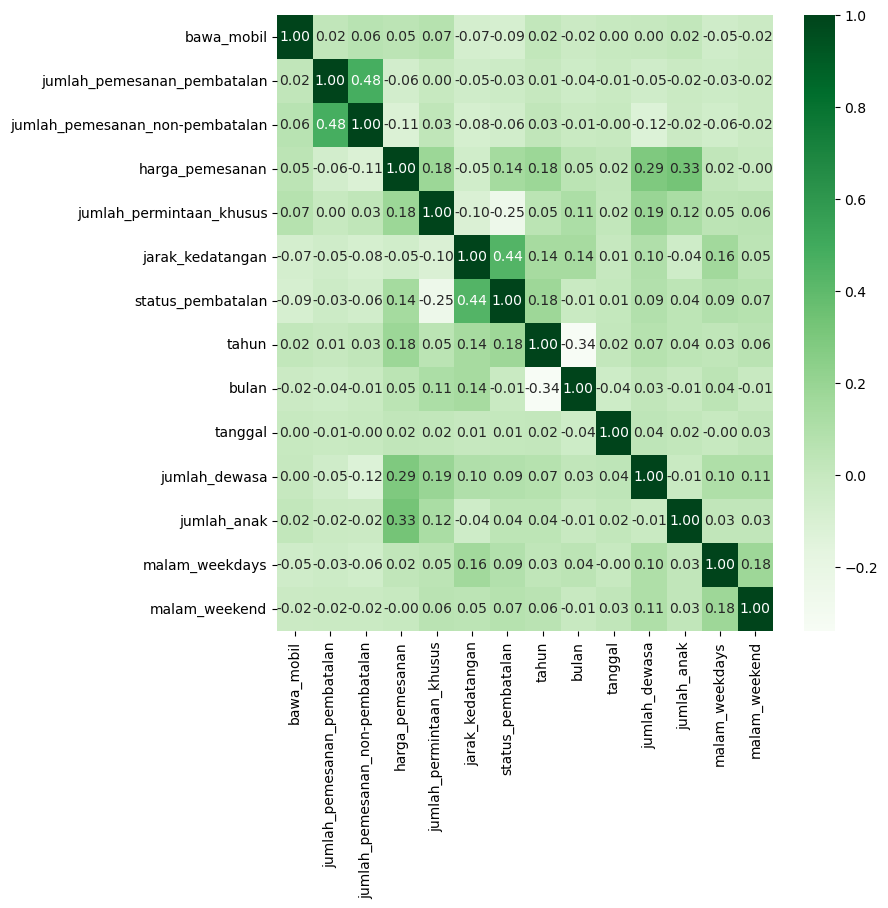

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(train_df_fixed.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

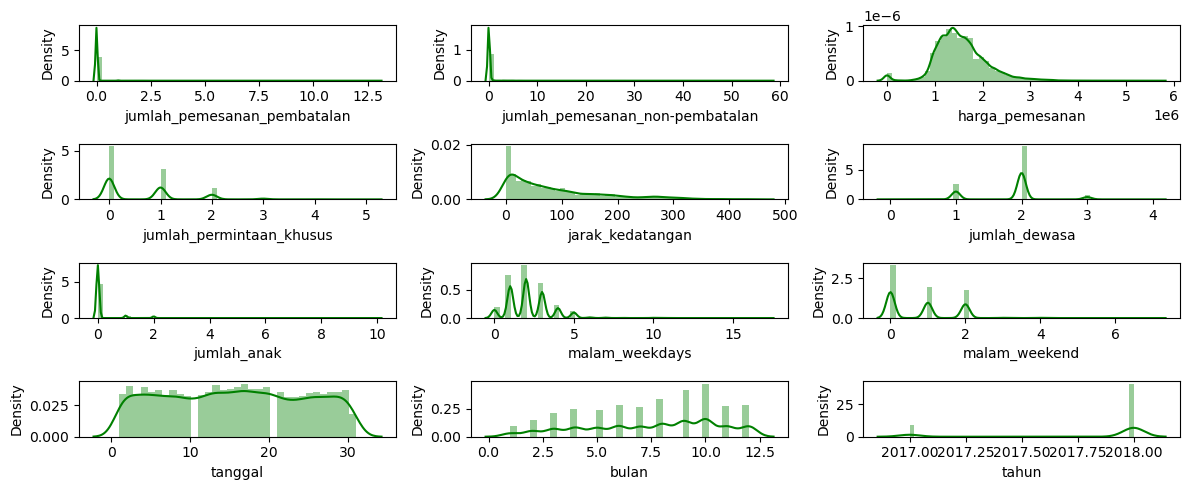

In [16]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(4, 3, i+1)
    sns.distplot(train_df_fixed[nums[i]], color='green')
    plt.tight_layout()

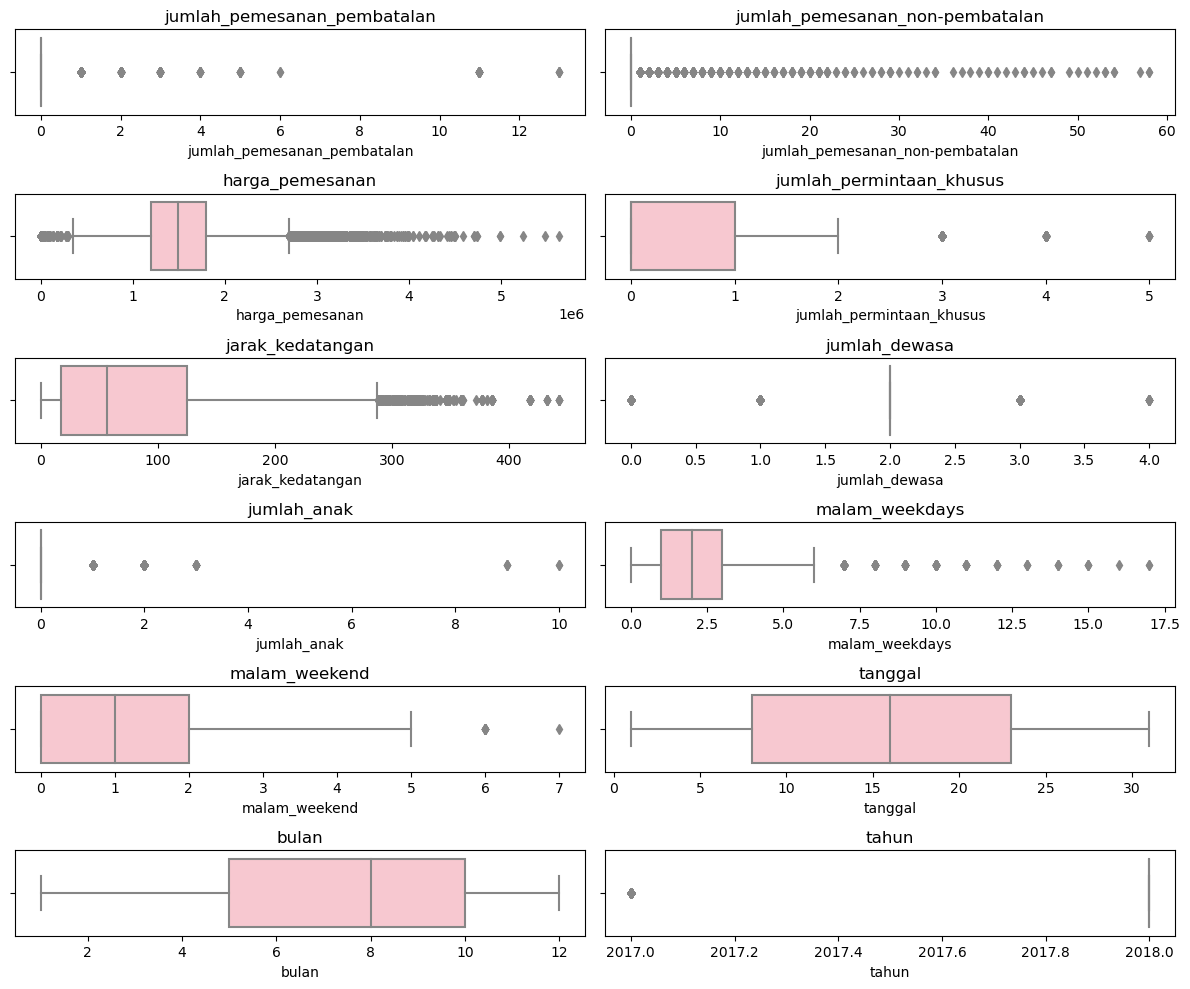

In [17]:
plt.figure(figsize=(12,10))
for i in range(0, len(nums)):
    plt.subplot(6,2,i+1)
    sns.boxplot(x=train_df_fixed[nums[i]], color='pink', orient='v').set_title(nums[i])
    plt.tight_layout()

## Analisis Feature Kategorikal

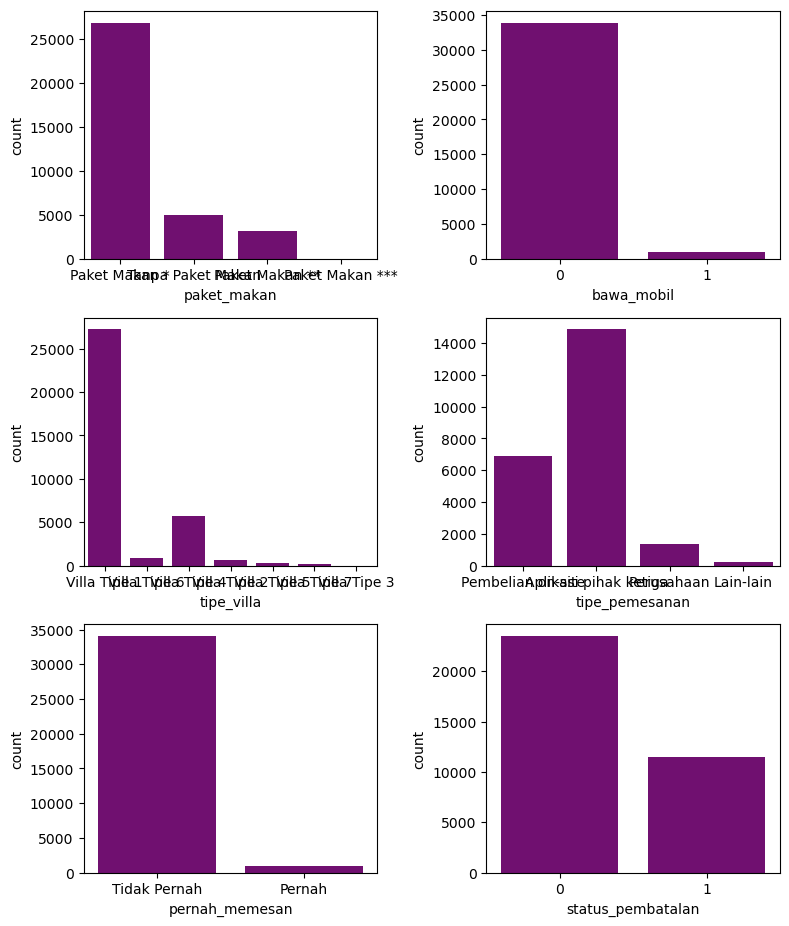

In [18]:
plt.figure(figsize=(8, 12))
for i in range(0, len(cats)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=train_df_fixed[cats[i]], color='purple', orient='v')
    plt.tight_layout()

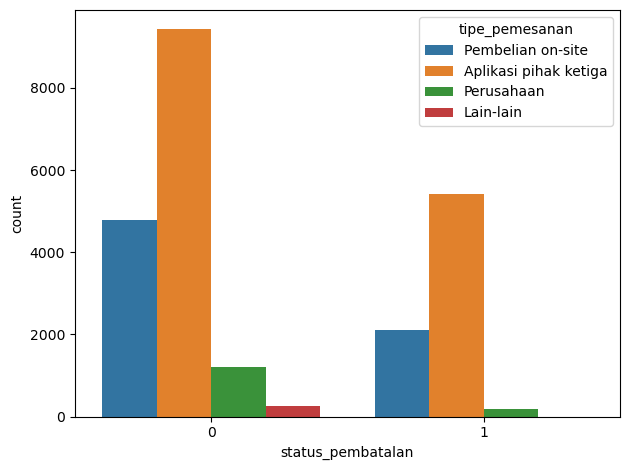

In [19]:
# Korelasi dengan status_pembatalan
sns.countplot(data=train_df_fixed, x="status_pembatalan", hue="tipe_pemesanan")
plt.tight_layout()

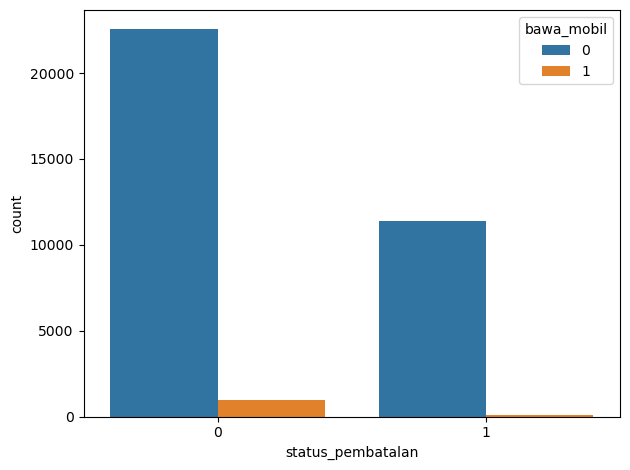

In [20]:
sns.countplot(data=train_df_fixed, x="status_pembatalan", hue="bawa_mobil")
plt.tight_layout()

# Data Cleaning

In [29]:
train_df_cleaned = train_df_fixed.copy()

## 1. Handle Missing Data

In [30]:
train_df_fixed.isna().sum()

paket_makan                            0
bawa_mobil                             0
tipe_villa                             0
tipe_pemesanan                     11570
pernah_memesan                         0
jumlah_pemesanan_pembatalan            0
jumlah_pemesanan_non-pembatalan        0
harga_pemesanan                        0
jumlah_permintaan_khusus            6036
jarak_kedatangan                   17608
status_pembatalan                      0
tahun                                  0
bulan                                  0
tanggal                                0
jumlah_dewasa                          0
jumlah_anak                            0
malam_weekdays                      9056
malam_weekend                       9056
dtype: int64

In [31]:
# Melihat persentase null masing-masing feature
null_perc = train_df_fixed.isnull().mean() * 100
print(null_perc)

paket_makan                         0.000000
bawa_mobil                          0.000000
tipe_villa                          0.000000
tipe_pemesanan                     33.089287
pernah_memesan                      0.000000
jumlah_pemesanan_pembatalan         0.000000
jumlah_pemesanan_non-pembatalan     0.000000
harga_pemesanan                     0.000000
jumlah_permintaan_khusus           17.262484
jarak_kedatangan                   50.357490
status_pembatalan                   0.000000
tahun                               0.000000
bulan                               0.000000
tanggal                             0.000000
jumlah_dewasa                       0.000000
jumlah_anak                         0.000000
malam_weekdays                     25.899445
malam_weekend                      25.899445
dtype: float64


Ada beberapa tindakan untuk mengatasi null value:
1. Feature `tipe_pemesanan` dihilangkan. 
2. `jumlah_permintaan_khusus` diamputasi dengan median.
3. `jarak_kedatangan` diamputasi dengan median.
4. `malam_weekdays` dan `malam_weekend` diamputasi dengan mean.

In [32]:
train_df_cleaned = train_df_cleaned.drop(['tipe_pemesanan'], axis=1)
train_df_cleaned['jumlah_permintaan_khusus'].fillna(train_df_cleaned['jumlah_permintaan_khusus'].median(), inplace=True)
train_df_cleaned['jarak_kedatangan'].fillna(train_df_cleaned['jarak_kedatangan'].median(), inplace=True)
train_df_cleaned['malam_weekdays'].fillna(train_df_cleaned['malam_weekdays'].mean(), inplace=True)
train_df_cleaned['malam_weekend'].fillna(train_df_cleaned['malam_weekend'].mean(), inplace=True)

In [33]:
# Cek lagi
null_perc = train_df_cleaned.isnull().mean() * 100
print(null_perc)

paket_makan                        0.0
bawa_mobil                         0.0
tipe_villa                         0.0
pernah_memesan                     0.0
jumlah_pemesanan_pembatalan        0.0
jumlah_pemesanan_non-pembatalan    0.0
harga_pemesanan                    0.0
jumlah_permintaan_khusus           0.0
jarak_kedatangan                   0.0
status_pembatalan                  0.0
tahun                              0.0
bulan                              0.0
tanggal                            0.0
jumlah_dewasa                      0.0
jumlah_anak                        0.0
malam_weekdays                     0.0
malam_weekend                      0.0
dtype: float64


## 2. Handle Data Duplikasi

In [34]:
# Mencari jumlah data duplikasi dan drop data tersebut
print(train_df_cleaned.duplicated().sum())

14963


In [35]:
# Drop data yang terduplikasi
train_df_cleaned.drop_duplicates(inplace=True)
print(train_df_cleaned.duplicated().sum())

0


## 3. Drop Feature Tanggal
Diasumsikan bahwa tanggal tidak mempengaruhi `status_pembatalan`.

In [ ]:
# train_df_cleaned = train_df_cleaned.drop(['tanggal_pemesanan'], axis=1)

## 4. Normalization
Karena nilai `harga_pemesanan` besar-besar, maka akan dilakukan normalisasi menggunakan np.log.

In [36]:
train_df_cleaned['harga_pemesanan'] = np.log(train_df_cleaned['harga_pemesanan'] + 1)

## 5. Feature Encoding

In [37]:
train_df_cleaned = pd.get_dummies(train_df_cleaned)
train_df_cleaned

,bawa_mobil,jumlah_pemesanan_pembatalan,jumlah_pemesanan_non-pembatalan,harga_pemesanan,jumlah_permintaan_khusus,jarak_kedatangan,status_pembatalan,tahun,bulan,tanggal,...,paket_makan_Tanpa Paket Makan,tipe_villa_Villa Tipe 1,tipe_villa_Villa Tipe 2,tipe_villa_Villa Tipe 3,tipe_villa_Villa Tipe 4,tipe_villa_Villa Tipe 5,tipe_villa_Villa Tipe 6,tipe_villa_Villa Tipe 7,pernah_memesan_Pernah,pernah_memesan_Tidak Pernah
0,0,0.0,0.0,14.213952,0.0,1.0,0,2017,8,26,...,0,1,0,0,0,0,0,0,0,1
1,0,0.0,0.0,14.338759,0.0,74.0,0,2018,6,27,...,0,1,0,0,0,0,0,0,0,1
2,0,0.0,0.0,14.669501,0.0,56.0,1,2018,12,19,...,0,0,0,0,0,0,1,0,0,1
3,0,0.0,0.0,14.198628,1.0,6.0,0,2018,9,2,...,1,1,0,0,0,0,0,0,0,1
4,1,0.0,0.0,14.461173,0.0,57.0,0,2018,6,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25151,0,0.0,0.0,13.456119,0.0,57.0,0,2017,8,31,...,0,1,0,0,0,0,0,0,0,1
25152,0,0.0,0.0,14.393247,0.0,57.0,1,2018,4,23,...,0,0,0,0,1,0,0,0,0,1
25153,0,0.0,0.0,14.097678,1.0,57.0,1,2018,11,29,...,0,1,0,0,0,0,0,0,0,1
25154,0,0.0,0.0,14.058458,0.0,57.0,1,2018,3,7,...,0,1,0,0,0,0,0,0,0,1


In [38]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20003 entries, 0 to 25155
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bawa_mobil                       20003 non-null  int64  
 1   jumlah_pemesanan_pembatalan      20003 non-null  float64
 2   jumlah_pemesanan_non-pembatalan  20003 non-null  float64
 3   harga_pemesanan                  20003 non-null  float64
 4   jumlah_permintaan_khusus         20003 non-null  float64
 5   jarak_kedatangan                 20003 non-null  float64
 6   status_pembatalan                20003 non-null  int64  
 7   tahun                            20003 non-null  int32  
 8   bulan                            20003 non-null  int32  
 9   tanggal                          20003 non-null  int32  
 10  jumlah_dewasa                    20003 non-null  float64
 11  jumlah_anak                      20003 non-null  float64
 12  malam_weekdays    

In [39]:
train_df_cleaned = train_df_cleaned.reset_index(drop=True)
train_df_cleaned

,bawa_mobil,jumlah_pemesanan_pembatalan,jumlah_pemesanan_non-pembatalan,harga_pemesanan,jumlah_permintaan_khusus,jarak_kedatangan,status_pembatalan,tahun,bulan,tanggal,...,paket_makan_Tanpa Paket Makan,tipe_villa_Villa Tipe 1,tipe_villa_Villa Tipe 2,tipe_villa_Villa Tipe 3,tipe_villa_Villa Tipe 4,tipe_villa_Villa Tipe 5,tipe_villa_Villa Tipe 6,tipe_villa_Villa Tipe 7,pernah_memesan_Pernah,pernah_memesan_Tidak Pernah
0,0,0.0,0.0,14.213952,0.0,1.0,0,2017,8,26,...,0,1,0,0,0,0,0,0,0,1
1,0,0.0,0.0,14.338759,0.0,74.0,0,2018,6,27,...,0,1,0,0,0,0,0,0,0,1
2,0,0.0,0.0,14.669501,0.0,56.0,1,2018,12,19,...,0,0,0,0,0,0,1,0,0,1
3,0,0.0,0.0,14.198628,1.0,6.0,0,2018,9,2,...,1,1,0,0,0,0,0,0,0,1
4,1,0.0,0.0,14.461173,0.0,57.0,0,2018,6,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19998,0,0.0,0.0,13.456119,0.0,57.0,0,2017,8,31,...,0,1,0,0,0,0,0,0,0,1
19999,0,0.0,0.0,14.393247,0.0,57.0,1,2018,4,23,...,0,0,0,0,1,0,0,0,0,1
20000,0,0.0,0.0,14.097678,1.0,57.0,1,2018,11,29,...,0,1,0,0,0,0,0,0,0,1
20001,0,0.0,0.0,14.058458,0.0,57.0,1,2018,3,7,...,0,1,0,0,0,0,0,0,0,1


# Modeling

In [40]:
attributes = [x for x in train_df_cleaned.columns if x != 'status_pembatalan']
label = ['status_pembatalan']

X = train_df_cleaned[attributes]
y = train_df_cleaned[label]

In [41]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

# latih model dengan fungsi fit
logreg_model = LogisticRegression()
logreg_model = logreg_model.fit(X_train, y_train)

In [43]:
# Uji akurasi model
logreg_model.score(X_test, y_test)

0.7538115471132217

In [44]:
# Evaluasi F1 score
from sklearn.metrics import f1_score

y_predict = logreg_model.predict(X_test)
f1_score(y_test, y_predict)

0.41956393635827927

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# Uji akurasi model
tree_model.score(X_test, y_test)

0.7398150462384404

In [47]:
# Evaluasi F1 score
from sklearn.metrics import f1_score

y_predict = tree_model.predict(X_test)
f1_score(y_test, y_predict)

0.5468001741401829

## Support Vector Machine

In [48]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [49]:
# Uji akurasi model
svm_model.score(X_test, y_test)

0.7128217945513622

In [50]:
# Evaluasi F1 score
from sklearn.metrics import f1_score

y_predict = svm_model.predict(X_test)
f1_score(y_test, y_predict)

0.05276174773289365

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

ranfor_model = RandomForestClassifier()
ranfor_model.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Uji akurasi model
ranfor_model.score(X_test, y_test)

0.8055486128467882

In [53]:
# Evaluasi F1 score
from sklearn.metrics import f1_score

y_predict = ranfor_model.predict(X_test)
f1_score(y_test, y_predict)

0.6140873015873016

### Hyperparameter Tuning: Random Forest

In [42]:
# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# param_grid = {
#     'n_estimators': [25, 50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
# }

# grid_search = GridSearchCV(RandomForestClassifier(),
#                            param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [52]:
# model_grid = RandomForestClassifier(max_depth=6,
#                                     max_features=None,
#                                     max_leaf_nodes=9,
#                                     n_estimators=25)
# model_grid.fit(X_train, y_train)

# model_grid.score(X_test, y_test)

0.765308672831792

In [53]:
# Evaluasi F1 score
# from sklearn.metrics import f1_score

# y_predict = model_grid.predict(X_test)
# f1_score(y_test, y_predict)

0.5192012288786483

## Neural Network

In [74]:
from keras.models import Sequential
from keras.layers import Dense

# define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=23, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
501/501 [==============================] - 4s 6ms/step - loss: 0.5781 - accuracy: 0.7188 - val_loss: 0.5214 - val_accuracy: 0.7418
Epoch 2/200
501/501 [==============================] - 3s 5ms/step - loss: 0.5420 - accuracy: 0.7330 - val_loss: 0.5280 - val_accuracy: 0.7363
Epoch 3/200
501/501 [==============================] - 3s 5ms/step - loss: 0.5345 - accuracy: 0.7365 - val_loss: 0.5143 - val_accuracy: 0.7426
Epoch 4/200
501/501 [==============================] - 3s 5ms/step - loss: 0.5397 - accuracy: 0.7305 - val_loss: 0.5108 - val_accuracy: 0.7416
Epoch 5/200
501/501 [==============================] - 3s 5ms/step - loss: 0.5210 - accuracy: 0.7357 - val_loss: 0.5265 - val_accuracy: 0.7366
Epoch 6/200
501/501 [==============================] - 3s 6ms/step - loss: 0.5162 - accuracy: 0.7378 - val_loss: 0.5094 - val_accuracy: 0.7416
Epoch 7/200
501/501 [==============================] - 3s 6ms/step - loss: 0.5224 - accuracy: 0.7387 - val_loss: 0.5877 - val_accuracy: 0.7101

Epoch 58/200
501/501 [==============================] - 3s 6ms/step - loss: 0.4789 - accuracy: 0.7609 - val_loss: 0.5196 - val_accuracy: 0.7533
Epoch 59/200
501/501 [==============================] - 3s 5ms/step - loss: 0.4794 - accuracy: 0.7586 - val_loss: 0.5237 - val_accuracy: 0.7451
Epoch 60/200
501/501 [==============================] - 3s 5ms/step - loss: 0.4780 - accuracy: 0.7605 - val_loss: 0.5193 - val_accuracy: 0.7523
Epoch 61/200
501/501 [==============================] - 3s 5ms/step - loss: 0.4787 - accuracy: 0.7593 - val_loss: 0.5178 - val_accuracy: 0.7538
Epoch 62/200
501/501 [==============================] - 3s 5ms/step - loss: 0.4782 - accuracy: 0.7609 - val_loss: 0.5252 - val_accuracy: 0.7538
Epoch 63/200
501/501 [==============================] - 3s 5ms/step - loss: 0.4771 - accuracy: 0.7623 - val_loss: 0.5255 - val_accuracy: 0.7463
Epoch 64/200
501/501 [==============================] - 3s 5ms/step - loss: 0.4782 - accuracy: 0.7593 - val_loss: 0.5267 - val_accuracy:

Epoch 115/200
501/501 [==============================] - 3s 6ms/step - loss: 0.4602 - accuracy: 0.7698 - val_loss: 0.5648 - val_accuracy: 0.7496
Epoch 116/200
501/501 [==============================] - 3s 6ms/step - loss: 0.4606 - accuracy: 0.7703 - val_loss: 0.5795 - val_accuracy: 0.7466
Epoch 117/200
501/501 [==============================] - 3s 6ms/step - loss: 0.4602 - accuracy: 0.7703 - val_loss: 0.5739 - val_accuracy: 0.7476
Epoch 118/200
501/501 [==============================] - 3s 5ms/step - loss: 0.4608 - accuracy: 0.7702 - val_loss: 0.5765 - val_accuracy: 0.7391
Epoch 119/200
501/501 [==============================] - 3s 5ms/step - loss: 0.4595 - accuracy: 0.7700 - val_loss: 0.5791 - val_accuracy: 0.7498
Epoch 120/200
501/501 [==============================] - 3s 5ms/step - loss: 0.4597 - accuracy: 0.7693 - val_loss: 0.5764 - val_accuracy: 0.7418
Epoch 121/200
501/501 [==============================] - 3s 6ms/step - loss: 0.4596 - accuracy: 0.7700 - val_loss: 0.5770 - val_ac

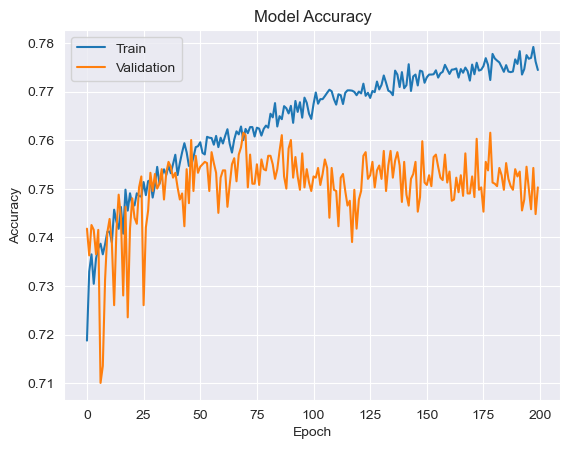

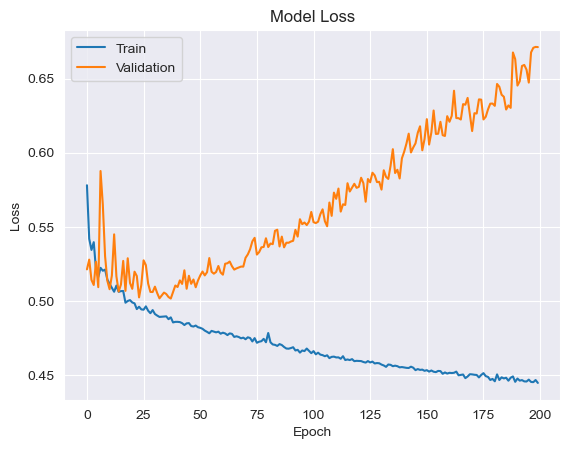

In [75]:
# plot training and validation accuracy
sns.set_style("darkgrid")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [76]:
model.evaluate(X_test, y_test, verbose=0)

[0.6712682843208313, 0.7503124475479126]

In [77]:
y_predict_proba = model.predict(X_test)
y_predict = (y_predict_proba > 0.5).astype(int)

In [78]:
f1_score(y_test, y_predict)

0.44407345575959933

# Preparation test.csv

In [66]:
test_df = pd.read_csv('test.csv', index_col=0)
test_df

,Pilihan Paket Makan,Membawa Mobil atau Tidak,Tipe Villa yang Dipesan,tipe_pemesanan,pernah_memesan,jumlah pemesanan pembatalan,jumlah pemesanan non-pembatalan,harga pemesanan,jumlah_permintaan_khusus,tanggal_pemesanan,jumlah dewasa;jumlah anak2,malam weekdays | malam weekend,Jarak Kedatangan
id,,,,,,,,,,,,,
0,Paket Makan *,0,Villa Tipe 4,Aplikasi pihak ketiga,Tidak Pernah,Tidak Ada,Tidak Ada,1836000.0 IDR,1 Item,2018-10-5,2;0 Pax,2 | 0 Malam,185 hari
1,Tanpa Paket Makan,0,Villa Tipe 1,Aplikasi pihak ketiga,Tidak Pernah,Tidak Ada,Tidak Ada,"1185000.0,00",Tidak Ada,2018-2-18,2;0 Pax,1 | 0 Malam,0 hari
2,Paket Makan **,0,Villa Tipe 1,Pembelian on-site,Tidak Pernah,Tidak Ada,Tidak Ada,2100000.0 Rupiah,1 Item,2018-9-28,2;0 Pax,4 | 0 Malam,100 hari
3,Paket Makan *,0,Villa Tipe 1,Aplikasi pihak ketiga,Tidak Pernah,Tidak Ada,Tidak Ada,"1394100.0,00",1 Item,2018-6-27,2;1 Pax,3 | 1 Malam,178 hari
4,Paket Makan *,0,Villa Tipe 1,Aplikasi pihak ketiga,Tidak Pernah,Tidak Ada,Tidak Ada,"1839000.0,00",Tidak Ada,2018-7-28,2;0 Pax,2 | 0 Malam,20 hari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11114,Paket Makan **,0,Villa Tipe 1,Aplikasi pihak ketiga,Tidak Pernah,Tidak Ada,Tidak Ada,"2400000.0,00",Tidak Ada,2018-9-30,2;0 Pax,2 | 1 Malam,315 hari
11115,Paket Makan *,0,Villa Tipe 1,Aplikasi pihak ketiga,Tidak Pernah,Tidak Ada,Tidak Ada,1147500.0 IDR,1 Item,2017-7-2,2;0 Pax,3 | 2 Malam,62 hari
11116,Paket Makan *,0,Villa Tipe 1,Aplikasi pihak ketiga,Tidak Pernah,Tidak Ada,Tidak Ada,2065499.9999999998 IDR,Tidak Ada,2018-8-6,3;0 Pax,1 | 1 Malam,195 hari


In [67]:
# Ubah nama kolom
test_df = test_df.rename(columns={'Pilihan Paket Makan': 'paket_makan', 
                        'Membawa Mobil atau Tidak': 'bawa_mobil',
                        'Tipe Villa yang Dipesan': 'tipe_villa',
                        'jumlah pemesanan pembatalan': 'jumlah_pemesanan_pembatalan',
                        'jumlah pemesanan non-pembatalan': 'jumlah_pemesanan_non-pembatalan',
                        'harga pemesanan': 'harga_pemesanan',
                        'jumlah dewasa;jumlah anak2': 'jumlah_dewasa;jumlah_anak',
                        'malam weekdays | malam weekend': 'malam_weekdays|malam_weekend',
                        'Jarak Kedatangan': 'jarak_kedatangan'})

test_df_fixed = test_df.copy()

# Feature jumlah_pemesanan_pembatalan
test_df_fixed['jumlah_pemesanan_pembatalan'][test_df_fixed['jumlah_pemesanan_pembatalan'] == 'Tidak Ada'] = '0'
test_df_fixed['jumlah_pemesanan_pembatalan'] = test_df_fixed['jumlah_pemesanan_pembatalan'].apply(lambda i: i.split(' ')[0])
test_df_fixed['jumlah_pemesanan_pembatalan'] = test_df_fixed['jumlah_pemesanan_pembatalan'].astype(float)

# Feature jumlah_pemesanan_non-pembatalan
test_df_fixed['jumlah_pemesanan_non-pembatalan'][test_df_fixed['jumlah_pemesanan_non-pembatalan'] == 'Tidak Ada'] = '0'
test_df_fixed['jumlah_pemesanan_non-pembatalan'] = test_df_fixed['jumlah_pemesanan_non-pembatalan'].apply(lambda i: i.split(' ')[0])
test_df_fixed['jumlah_pemesanan_non-pembatalan'] = test_df_fixed['jumlah_pemesanan_non-pembatalan'].astype(float)

# Feature harga_pemesanan
test_df_fixed['harga_pemesanan'] = test_df_fixed['harga_pemesanan'].apply(lambda i: i.split('.')[0])
test_df_fixed['harga_pemesanan'] = test_df_fixed['harga_pemesanan'].astype(float)

# Feature jumlah_permintaan_khusus (ada null)
test_df_fixed['jumlah_permintaan_khusus'][test_df_fixed['jumlah_permintaan_khusus'] == 'Tidak Ada'] = '0'
test_df_fixed['jumlah_permintaan_khusus'] = test_df_fixed['jumlah_permintaan_khusus'].apply(lambda i: i.split(' ')[0] if pd.notnull(i) else i)
test_df_fixed['jumlah_permintaan_khusus'] = test_df_fixed['jumlah_permintaan_khusus'].astype(float)

# Feature tanggal_pemesanan
test_df_fixed['tahun'] = test_df_fixed['tanggal_pemesanan'].apply(lambda i: i.split('-')[0] if pd.notnull(i) else i)
test_df_fixed['bulan'] = test_df_fixed['tanggal_pemesanan'].apply(lambda i: i.split('-')[1] if pd.notnull(i) else i)
test_df_fixed['tanggal'] = test_df_fixed['tanggal_pemesanan'].apply(lambda i: i.split('-')[2] if pd.notnull(i) else i)

test_df_fixed['tahun'] = test_df_fixed['tahun'].astype(int)
test_df_fixed['bulan'] = test_df_fixed['bulan'].astype(int)
test_df_fixed['tanggal'] = test_df_fixed['tanggal'].astype(int)

test_df_fixed.drop('tanggal_pemesanan', axis=1, inplace=True)

# Feature jumlah_dewasa;jumlah_anak
test_df_fixed['jumlah_dewasa;jumlah_anak'] = test_df_fixed['jumlah_dewasa;jumlah_anak'].apply(lambda i: i.split(' ')[0])
test_df_fixed['jumlah_dewasa'] = test_df_fixed['jumlah_dewasa;jumlah_anak'].apply(lambda i: i.split(';')[0])
test_df_fixed['jumlah_anak'] = test_df_fixed['jumlah_dewasa;jumlah_anak'].apply(lambda i: i.split(';')[1])
test_df_fixed['jumlah_dewasa'] = test_df_fixed['jumlah_dewasa'].astype(float)
test_df_fixed['jumlah_anak'] = test_df_fixed['jumlah_anak'].astype(float)
test_df_fixed = test_df_fixed.drop('jumlah_dewasa;jumlah_anak', axis=1)

# Feature malam_weekdays|malam_weekend (ada null)
test_df_fixed['malam_weekdays'] = test_df_fixed['malam_weekdays|malam_weekend'].apply(lambda i: i.split(' ')[0] if pd.notnull(i) else i)
test_df_fixed['malam_weekend'] = test_df_fixed['malam_weekdays|malam_weekend'].apply(lambda i: i.split(' ')[2] if pd.notnull(i) else i)
test_df_fixed['malam_weekdays'] = test_df_fixed['malam_weekdays'].astype(float)
test_df_fixed['malam_weekend'] = test_df_fixed['malam_weekend'].astype(float)
test_df_fixed = test_df_fixed.drop('malam_weekdays|malam_weekend', axis=1)

# Feature jarak_kedatangan (ada null)
test_df_fixed['jarak_kedatangan'] = test_df_fixed['jarak_kedatangan'].apply(lambda i: i.split(' ')[0] if pd.notnull(i) else i)
test_df_fixed['jarak_kedatangan'] = test_df_fixed['jarak_kedatangan'].astype(float)

                                                                       
test_df_cleaned = test_df_fixed.copy()

test_df_cleaned = test_df_cleaned.drop(['tipe_pemesanan'], axis=1)

# test_df_cleaned = test_df_cleaned.drop(['tanggal_pemesanan'], axis=1)

test_df_cleaned['harga_pemesanan'] = np.log(test_df_cleaned['harga_pemesanan'] + 1)    

test_df_cleaned = pd.get_dummies(test_df_cleaned)

test_df_cleaned = test_df_cleaned.reset_index(drop=True)
test_df_cleaned

,bawa_mobil,jumlah_pemesanan_pembatalan,jumlah_pemesanan_non-pembatalan,harga_pemesanan,jumlah_permintaan_khusus,jarak_kedatangan,tahun,bulan,tanggal,jumlah_dewasa,...,paket_makan_Paket Makan ***,paket_makan_Tanpa Paket Makan,tipe_villa_Villa Tipe 1,tipe_villa_Villa Tipe 2,tipe_villa_Villa Tipe 4,tipe_villa_Villa Tipe 5,tipe_villa_Villa Tipe 6,tipe_villa_Villa Tipe 7,pernah_memesan_Pernah,pernah_memesan_Tidak Pernah
0,0,0.0,0.0,14.423100,1.0,185.0,2018,10,5,2.0,...,0,0,0,0,1,0,0,0,0,1
1,0,0.0,0.0,13.985254,0.0,0.0,2018,2,18,2.0,...,0,1,1,0,0,0,0,0,0,1
2,0,0.0,0.0,14.557448,1.0,100.0,2018,9,28,2.0,...,0,0,1,0,0,0,0,0,0,1
3,0,0.0,0.0,14.147760,1.0,178.0,2018,6,27,2.0,...,0,0,1,0,0,0,0,0,0,1
4,0,0.0,0.0,14.424733,0.0,20.0,2018,7,28,2.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11114,0,0.0,0.0,14.690980,0.0,315.0,2018,9,30,2.0,...,0,0,1,0,0,0,0,0,0,1
11115,0,0.0,0.0,13.953097,1.0,62.0,2017,7,2,2.0,...,0,0,1,0,0,0,0,0,0,1
11116,0,0.0,0.0,14.540883,0.0,195.0,2018,8,6,3.0,...,0,0,1,0,0,0,0,0,0,1
11117,0,0.0,0.0,13.811805,0.0,0.0,2018,8,2,2.0,...,0,1,1,0,0,0,0,0,0,1


In [68]:
test_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bawa_mobil                       11119 non-null  int64  
 1   jumlah_pemesanan_pembatalan      11119 non-null  float64
 2   jumlah_pemesanan_non-pembatalan  11119 non-null  float64
 3   harga_pemesanan                  11119 non-null  float64
 4   jumlah_permintaan_khusus         11119 non-null  float64
 5   jarak_kedatangan                 11119 non-null  float64
 6   tahun                            11119 non-null  int32  
 7   bulan                            11119 non-null  int32  
 8   tanggal                          11119 non-null  int32  
 9   jumlah_dewasa                    11119 non-null  float64
 10  jumlah_anak                      11119 non-null  float64
 11  malam_weekdays                   11119 non-null  float64
 12  malam_weekend     

In [69]:
test_df_cleaned.insert(19, 'tipe_villa_Villa Tipe 3', 0)
test_df_cleaned['tipe_villa_Villa Tipe 3'] = test_df_cleaned['tipe_villa_Villa Tipe 3'].astype('uint8')

In [70]:
test_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bawa_mobil                       11119 non-null  int64  
 1   jumlah_pemesanan_pembatalan      11119 non-null  float64
 2   jumlah_pemesanan_non-pembatalan  11119 non-null  float64
 3   harga_pemesanan                  11119 non-null  float64
 4   jumlah_permintaan_khusus         11119 non-null  float64
 5   jarak_kedatangan                 11119 non-null  float64
 6   tahun                            11119 non-null  int32  
 7   bulan                            11119 non-null  int32  
 8   tanggal                          11119 non-null  int32  
 9   jumlah_dewasa                    11119 non-null  float64
 10  jumlah_anak                      11119 non-null  float64
 11  malam_weekdays                   11119 non-null  float64
 12  malam_weekend     

In [71]:
test_df_cleaned

,bawa_mobil,jumlah_pemesanan_pembatalan,jumlah_pemesanan_non-pembatalan,harga_pemesanan,jumlah_permintaan_khusus,jarak_kedatangan,tahun,bulan,tanggal,jumlah_dewasa,...,paket_makan_Tanpa Paket Makan,tipe_villa_Villa Tipe 1,tipe_villa_Villa Tipe 2,tipe_villa_Villa Tipe 3,tipe_villa_Villa Tipe 4,tipe_villa_Villa Tipe 5,tipe_villa_Villa Tipe 6,tipe_villa_Villa Tipe 7,pernah_memesan_Pernah,pernah_memesan_Tidak Pernah
0,0,0.0,0.0,14.423100,1.0,185.0,2018,10,5,2.0,...,0,0,0,0,1,0,0,0,0,1
1,0,0.0,0.0,13.985254,0.0,0.0,2018,2,18,2.0,...,1,1,0,0,0,0,0,0,0,1
2,0,0.0,0.0,14.557448,1.0,100.0,2018,9,28,2.0,...,0,1,0,0,0,0,0,0,0,1
3,0,0.0,0.0,14.147760,1.0,178.0,2018,6,27,2.0,...,0,1,0,0,0,0,0,0,0,1
4,0,0.0,0.0,14.424733,0.0,20.0,2018,7,28,2.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11114,0,0.0,0.0,14.690980,0.0,315.0,2018,9,30,2.0,...,0,1,0,0,0,0,0,0,0,1
11115,0,0.0,0.0,13.953097,1.0,62.0,2017,7,2,2.0,...,0,1,0,0,0,0,0,0,0,1
11116,0,0.0,0.0,14.540883,0.0,195.0,2018,8,6,3.0,...,0,1,0,0,0,0,0,0,0,1
11117,0,0.0,0.0,13.811805,0.0,0.0,2018,8,2,2.0,...,1,1,0,0,0,0,0,0,0,1


In [72]:
predictions = ranfor_model.predict(test_df_cleaned)
predictions

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

## Export Submission

In [73]:
submission = pd.read_csv('sample_submission_kc1.csv')
submission['status pembatalan'] = predictions
submission

,id,status pembatalan
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
11114,11114,1
11115,11115,1
11116,11116,1
11117,11117,0


In [74]:
submission.to_csv("submission_04.csv",index=False)